# Decision Boundaries For Quadratic Discriminant Analysis

In [13]:
import numpy as np
v1_t = np.array([1, 3])
v1_t = v1_t / np.linalg.norm(v1_t) # transpose of the first eigenvector
v2_t = np.array([3, -1]) # transpose of the second eigenvector
v2_t = v2_t / np.linalg.norm(v2_t)
eigenvector_matrix = np.array([v1_t, v2_t]).transpose() # eigenvector matrix
lambda1 = 1 # first eigenvalue
lambda2 = 2 # second eigenvalue
eigenvalue_matrix = np.array([[lambda1, 0],[0, lambda2]])
print("the eigenvector matrix of the first distribution:")
print(eigenvector_matrix)
print("the eigenvalue matrix of the first distribution")
print(eigenvalue_matrix)
cov_1 = np.matmul(np.matmul(eigenvector_matrix, eigenvalue_matrix), np.linalg.inv(eigenvector_matrix))
print("the covariance matrix of the first distribution")
print(cov_1)
mean_1_t = np.array([1.0, 1.0]) # the mean vector of the first distribution
print("transpose of the mean vector of the first distribution")
print(mean_1_t)

the eigenvector matrix of the first distribution:
[[ 0.31622777  0.9486833 ]
 [ 0.9486833  -0.31622777]]
the eigenvalue matrix of the first distribution
[[1 0]
 [0 2]]
the covariance matrix of the first distribution
[[ 1.9 -0.3]
 [-0.3  1.1]]
transpose of the mean vector of the first distribution
[1. 1.]


In [14]:
v1_t = np.array([-1, 4]) 
v1_t = v1_t / np.linalg.norm(v1_t) # transpose of the first eigenvector
v2_t = np.array([4, 1])
v2_t = v2_t / np.linalg.norm(v2_t) # transpose of the second eigenvector
eigenvector_matrix = np.array([v1_t, v2_t]).transpose() # eigenvector matrix
lambda1 = 4 # first eigenvalue
lambda2 = 2 # second eigenvalue
eigenvalue_matrix = np.array([[lambda1, 0],[0, lambda2]])
print("the eigenvector matrix of the second distribution:")
print(eigenvector_matrix)
print("the eigenvalue matrix of the second distribution")
print(eigenvalue_matrix)
cov_2 = np.matmul(np.matmul(eigenvector_matrix, eigenvalue_matrix), np.linalg.inv(eigenvector_matrix))
print("the covariance matrix of the second distribution")
print(cov_2)
mean_2_t = np.array([3.0, 3.0]) # the mean vector of the second distribution
print("transpose of the mean vector of the second distribution")
print(mean_2_t)

the eigenvector matrix of the second distribution:
[[-0.24253563  0.9701425 ]
 [ 0.9701425   0.24253563]]
the eigenvalue matrix of the second distribution
[[4 0]
 [0 2]]
the covariance matrix of the second distribution
[[ 2.11764706 -0.47058824]
 [-0.47058824  3.88235294]]
transpose of the mean vector of the second distribution
[3. 3.]


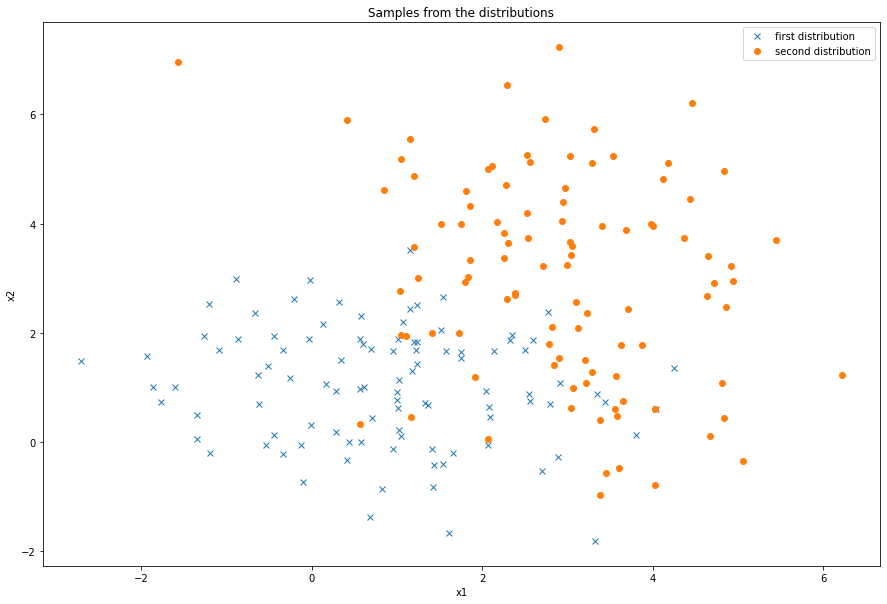

In [15]:
import matplotlib.pyplot as plt

# samples from the first distribution
x1_s, y1_s = np.random.default_rng().multivariate_normal(mean_1_t, cov_1, 100).T

# samples from the second distribution
x2_s, y2_s = np.random.default_rng().multivariate_normal(mean_2_t, cov_2, 100).T

fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('Samples from the distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

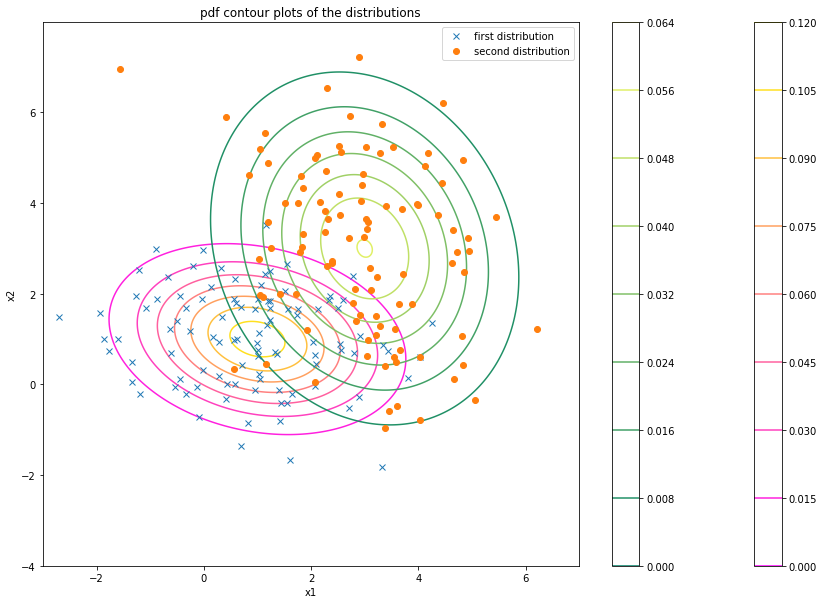

In [16]:
from scipy.stats import multivariate_normal

x_min = -3.0
x_max = 7.0
y_min = -4.0
y_max = 8.0
x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv1 = multivariate_normal(mean_1_t, cov_1)
rv2 = multivariate_normal(mean_2_t, cov_2)

cmap1 = plt.cm.get_cmap("spring")
cmap2 = plt.cm.get_cmap("summer")

fig, ax = plt.subplots(figsize=(15, 10))
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

_ = ax.set_title('pdf contour plots of the distributions')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

In [17]:
A = np.linalg.inv(cov_1)-np.linalg.inv(cov_2)
a11 = A[0, 0]
a12 = A[0, 1]
a21 = A[1, 0]
a22 = A[1, 1]

cov1_inv = np.linalg.inv(cov_1)
cov2_inv = np.linalg.inv(cov_2)
B = np.matmul(cov1_inv, mean_1_t)-np.matmul(cov2_inv, mean_2_t)
b11 = B[0]
b21 = B[1]

pi_c1 = 0.5
pi_c2 = 0.5

x1 = np.arange(x_min, x_max, step=0.01)

a_term = 0.5*a22

b_term = 0.5*(a12+a21)*x1-b21

c_term = (0.5*a11*x1*x1)- \
         (b11*x1)+ \
         0.5*(np.matmul(mean_1_t, np.matmul(cov1_inv, mean_1_t))- 
              np.matmul(mean_2_t, np.matmul(cov2_inv, mean_2_t)))+ \
         0.5*(np.log(np.linalg.det(cov_1))-np.log(np.linalg.det(cov_2)))- \
         (np.log(pi_c1)-np.log(pi_c2))

delta = b_term*b_term-4*a_term*c_term

x2_1 = (-b_term+np.sqrt(delta))/(2*a_term)
x2_2 = (-b_term-np.sqrt(delta))/(2*a_term)

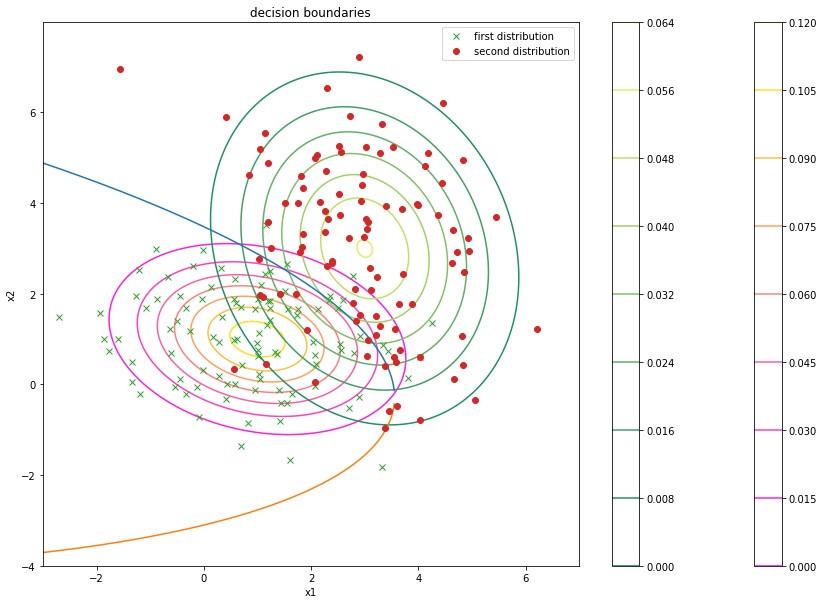

In [18]:
fig, ax = plt.subplots(figsize=(15.0, 10.0))
_ = ax.plot(x1, x2_1)
_ = ax.plot(x1, x2_2)
contour_plot_1 = ax.contour(x, y, rv1.pdf(pos), cmap=cmap1)
contour_plot_2 = ax.contour(x, y, rv2.pdf(pos), cmap=cmap2)
_ = fig.colorbar(contour_plot_1, ax=ax)
_ = fig.colorbar(contour_plot_2, ax=ax)

_ = ax.plot(x1_s, y1_s, 'x', label='first distribution')
_ = ax.plot(x2_s, y2_s, 'o', label='second distribution')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)

_ = ax.set_title('decision boundaries')
_ = plt.xlabel('x1')
_ = plt.ylabel('x2')

# References
Machine Learning A Probabilistic Perspective, Kevin P. Murphy